In [37]:
from keras.datasets import mnist
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout,Conv2D,MaxPooling2D,Flatten
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
(X_train, y_train), (X_test, y_test) = mnist.load_data()


In [3]:
print(X_train[0])
print(Y_train[0])


[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

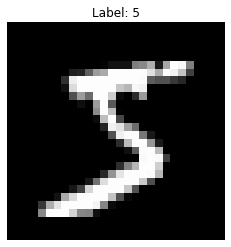

In [4]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0], cmap="gray")
plt.title("Label: " + str(Y_train[0]))
plt.axis("off")
plt.show()


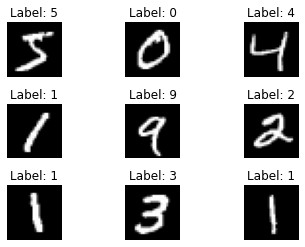

In [5]:
sub_plot= 330
for i in range(0, 9):
    ax = plt.subplot(sub_plot+i+1)
    ax.imshow(X_train[i], cmap="gray")
    ax.set_title("Label: " + str(Y_train[i]))
    ax.axis("off")

plt.subplots_adjust(hspace = .5)
plt.show()


In [45]:
X_train = X_train.reshape(X_train.shape[0],28*28) / 255
X_test = X_test.reshape(X_test.shape[0],28*28) / 255
y_train_onehot = np_utils.to_categorical(y_train, num_classes=10)
y_test_onehot = np_utils.to_categorical(y_test, num_classes=10)

In [48]:
X_train.shape

(60000, 784)

In [10]:
model = Sequential()
model.add(Dense(256, input_dim=28*28, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(256, activation="relu"))
model.add(Dense(10, activation="softmax"))
model.summary() #顯示摘要資訊

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 256)               200960    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_7 (Dense)              (None, 10)                2570      
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history=model.fit(X_train,y_train_onehot, epochs=10, batch_size=5)

Epoch 1/10
60000/60000 [==============================] - 37s 612us/step - loss: 0.1412 - accuracy: 0.9670
Epoch 2/10
60000/60000 [==============================] - 36s 602us/step - loss: 0.1323 - accuracy: 0.9678
Epoch 3/10
60000/60000 [==============================] - 36s 598us/step - loss: 0.1328 - accuracy: 0.9680
Epoch 4/10
60000/60000 [==============================] - 36s 597us/step - loss: 0.1271 - accuracy: 0.9694
Epoch 5/10
60000/60000 [==============================] - 35s 589us/step - loss: 0.1250 - accuracy: 0.9703
Epoch 6/10
60000/60000 [==============================] - 36s 606us/step - loss: 0.1234 - accuracy: 0.9700
Epoch 7/10
60000/60000 [==============================] - 36s 592us/step - loss: 0.1246 - accuracy: 0.9692
Epoch 8/10
60000/60000 [==============================] - 38s 636us/step - loss: 0.1238 - accuracy: 0.9691
Epoch 9/10
60000/60000 [==============================] - 35s 578us/step - loss: 0.1195 - accuracy: 0.9710
Epoch 10/10
60000/60000 [============

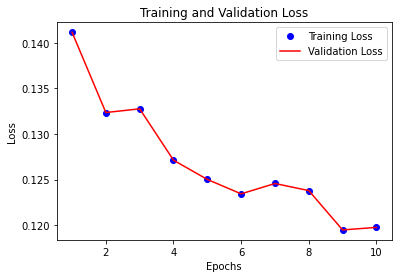

In [24]:
import matplotlib.pyplot as plt
loss = history.history["loss"]
epochs = range(1, len(loss)+1)
val_loss = history.history["loss"]
plt.plot(epochs, loss, "bo", label="Training Loss")
plt.plot(epochs, val_loss, "r", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

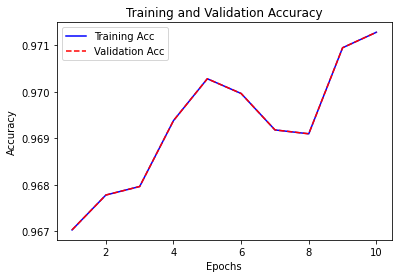

In [27]:
acc = history.history["accuracy"]
epochs = range(1, len(acc)+1)
val_acc = history.history["accuracy"]
plt.plot(epochs, acc, "b-", label="Training Acc")
plt.plot(epochs, val_acc, "r--", label="Validation Acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [49]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0],28,28,1)
X_test = X_test.reshape(X_test.shape[0],28,28,1)
y_train_onehot = np_utils.to_categorical(y_train, num_classes=10)
y_test_onehot = np_utils.to_categorical(y_test, num_classes=10)

In [50]:
X_train.shape

(60000, 28, 28, 1)

In [51]:
model = Sequential()
model.add(Conv2D(16, kernel_size=(5, 5), padding="same",  input_shape=(28, 28, 1), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, kernel_size=(5, 5), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))
model.summary() #顯示摘要資訊

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 14, 14, 32)        12832     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)             

In [52]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history=model.fit(X_train,y_train_onehot, epochs=10, batch_size=5)

Epoch 1/10
60000/60000 [==============================] - 86s 1ms/step - loss: 0.6161 - accuracy: 0.8523
Epoch 2/10
60000/60000 [==============================] - 87s 1ms/step - loss: 0.3004 - accuracy: 0.9224
Epoch 3/10
60000/60000 [==============================] - 81s 1ms/step - loss: 0.2721 - accuracy: 0.9306
Epoch 4/10
60000/60000 [==============================] - 81s 1ms/step - loss: 0.2613 - accuracy: 0.9337
Epoch 5/10
60000/60000 [==============================] - 86s 1ms/step - loss: 0.2602 - accuracy: 0.9347
Epoch 6/10
60000/60000 [==============================] - 86s 1ms/step - loss: 0.2598 - accuracy: 0.9359
Epoch 7/10
60000/60000 [==============================] - 87s 1ms/step - loss: 0.2659 - accuracy: 0.9383
Epoch 8/10
60000/60000 [==============================] - 84s 1ms/step - loss: 0.2787 - accuracy: 0.9338
Epoch 9/10
60000/60000 [==============================] - 82s 1ms/step - loss: 0.2691 - accuracy: 0.9352
Epoch 10/10
60000/60000 [==============================

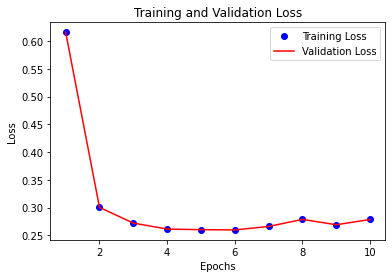

In [53]:
import matplotlib.pyplot as plt
loss = history.history["loss"]
epochs = range(1, len(loss)+1)
val_loss = history.history["loss"]
plt.plot(epochs, loss, "bo", label="Training Loss")
plt.plot(epochs, val_loss, "r", label="Validation Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

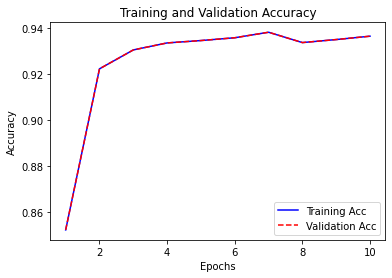

In [54]:
acc = history.history["accuracy"]
epochs = range(1, len(acc)+1)
val_acc = history.history["accuracy"]
plt.plot(epochs, acc, "b-", label="Training Acc")
plt.plot(epochs, val_acc, "r--", label="Validation Acc")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()